In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loader

In [43]:
# 파일이 저장된 절대 경로 입력
data = pd.read_csv('amazon_prime_users.csv')

# 데이터 구조 확인
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   User ID                        2500 non-null   int64  
 1   Name                           2500 non-null   object 
 2   Email Address                  2500 non-null   object 
 3   Username                       2500 non-null   object 
 4   Date of Birth                  2500 non-null   object 
 5   Gender                         2500 non-null   object 
 6   Location                       2500 non-null   object 
 7   Membership Start Date          2500 non-null   object 
 8   Membership End Date            2500 non-null   object 
 9   Subscription Plan              2500 non-null   object 
 10  Payment Information            2500 non-null   object 
 11  Renewal Status                 2500 non-null   object 
 12  Usage Frequency                2500 non-null   o

# Feature Engineering

In [44]:
def toInt(string):
    return int(string.replace('-',''))

def TFtoInt(string):
    if string == 'False' :
        return 0
    else :
        return 1

In [45]:
# 필요없는 피쳐를 삭제합니다.
selected_data = data.drop(['User ID', 'Name', 'Email Address', 'Username', 'Location', 'Membership Start Date', 'Membership End Date', 'Payment Information', 'Renewal Status', 'Feedback/Ratings'], axis=1)
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Date of Birth                  2500 non-null   object
 1   Gender                         2500 non-null   object
 2   Subscription Plan              2500 non-null   object
 3   Usage Frequency                2500 non-null   object
 4   Purchase History               2500 non-null   object
 5   Favorite Genres                2500 non-null   object
 6   Devices Used                   2500 non-null   object
 7   Engagement Metrics             2500 non-null   object
 8   Customer Support Interactions  2500 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 175.9+ KB


In [46]:
#Date of Birth
selected_data['Date of Birth'] = selected_data['Date of Birth'].str[:4]
selected_data['Date of Birth'] = selected_data['Date of Birth'].apply(toInt)
selected_data = selected_data.rename(columns={'Date of Birth': 'Year of Birth'})

#Gender
one_hot_gender = pd.get_dummies(selected_data['Gender'])
selected_data = pd.concat([selected_data, one_hot_gender], axis=1)
selected_data[['Female', 'Male']] = selected_data[['Female', 'Male']].astype(int)
selected_data.drop('Gender', axis=1, inplace=True)

#Subscription Plan (y값)
selected_data['Subscription Plan'] = selected_data['Subscription Plan'].replace({'Annual': 0, 'Monthly': 1})

#Usage Frequency
one_hot_usage = pd.get_dummies(selected_data['Usage Frequency'])
selected_data = pd.concat([selected_data, one_hot_usage], axis=1)
selected_data[['Regular', 'Frequent', 'Occasional']] = selected_data[['Regular', 'Frequent', 'Occasional']].astype(int)
selected_data.drop('Usage Frequency', axis=1, inplace=True)

#Engagement Metrics
selected_data['Engagement Metrics'] = selected_data['Engagement Metrics'].replace({'Low': 0.3, 'Medium':0.5, 'High': 0.7})

#Purchase History
one_hot_purchase = pd.get_dummies(selected_data['Purchase History'])
selected_data = pd.concat([selected_data, one_hot_purchase], axis=1)
selected_data[['Books', 'Clothing', 'Electronics']] = selected_data[['Books', 'Clothing', 'Electronics']].astype(int)
selected_data.drop('Purchase History', axis=1, inplace=True)

#Favorite Genres
one_hot_genres = pd.get_dummies(selected_data['Favorite Genres'])
selected_data = pd.concat([selected_data, one_hot_genres], axis=1)
selected_data[['Documentary', 'Horror', 'Comedy', 'Drama', 'Action', 'Sci-Fi',
       'Romance']] = selected_data[['Documentary', 'Horror', 'Comedy', 'Drama', 'Action', 'Sci-Fi',
       'Romance']].astype(int)
selected_data.drop('Favorite Genres', axis=1, inplace=True)

#Devices Used
one_hot_device = pd.get_dummies(selected_data['Devices Used'])
selected_data = pd.concat([selected_data, one_hot_device], axis=1)
selected_data[['Smart TV', 'Smartphone', 'Tablet']] = selected_data[['Smart TV', 'Smartphone', 'Tablet']].astype(int)
selected_data.drop('Devices Used', axis=1, inplace=True)

selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year of Birth                  2500 non-null   int64  
 1   Subscription Plan              2500 non-null   int64  
 2   Engagement Metrics             2500 non-null   float64
 3   Customer Support Interactions  2500 non-null   int64  
 4   Female                         2500 non-null   int32  
 5   Male                           2500 non-null   int32  
 6   Frequent                       2500 non-null   int32  
 7   Occasional                     2500 non-null   int32  
 8   Regular                        2500 non-null   int32  
 9   Books                          2500 non-null   int32  
 10  Clothing                       2500 non-null   int32  
 11  Electronics                    2500 non-null   int32  
 12  Action                         2500 non-null   i

C:\Users\KimTY\AppData\Local\Temp\ipykernel_27012\4082353003.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  selected_data['Subscription Plan'] = selected_data['Subscription Plan'].replace({'Annual': 0, 'Monthly': 1})
C:\Users\KimTY\AppData\Local\Temp\ipykernel_27012\4082353003.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  selected_data['Engagement Metrics'] = selected_data['Engagement Metrics'].replace({'Low': 0.3, 'Medium':0.5, 'High': 0.7})


C:\Users\KimTY\AppData\Local\Temp\ipykernel_27012\122164908.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(selected_data['Year of Birth'], bins=30, kde=True, palette='Set1')
C:\ProgramData\conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


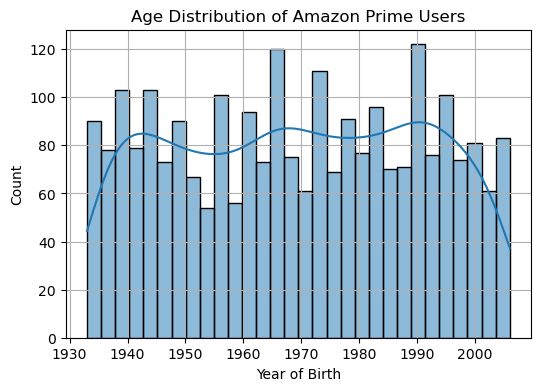

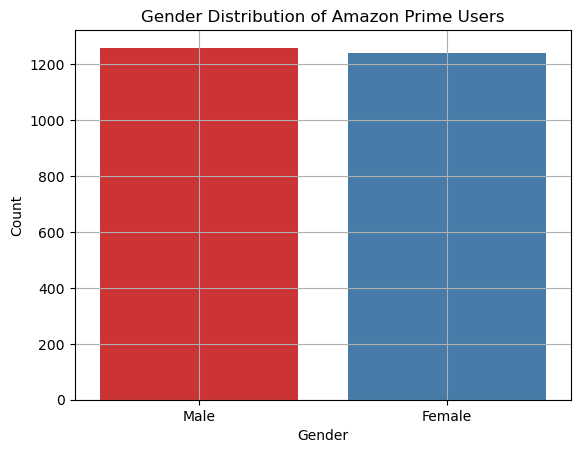

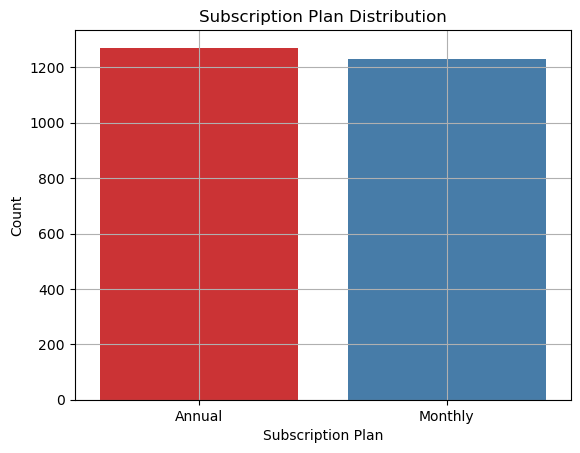

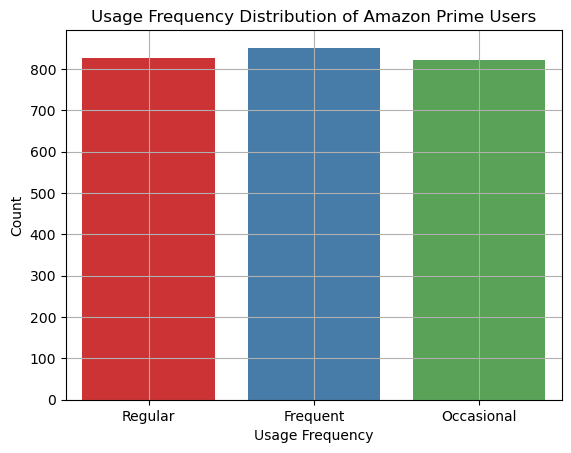

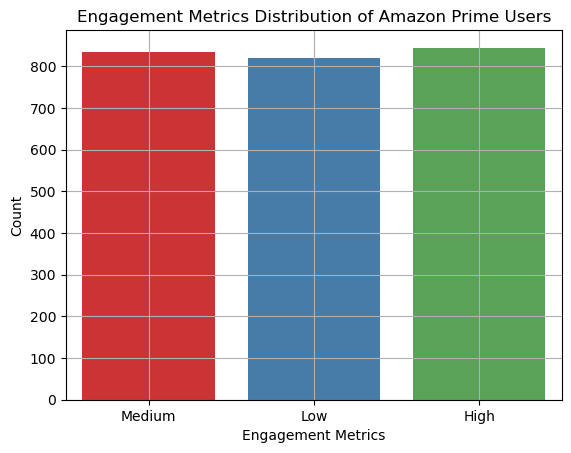

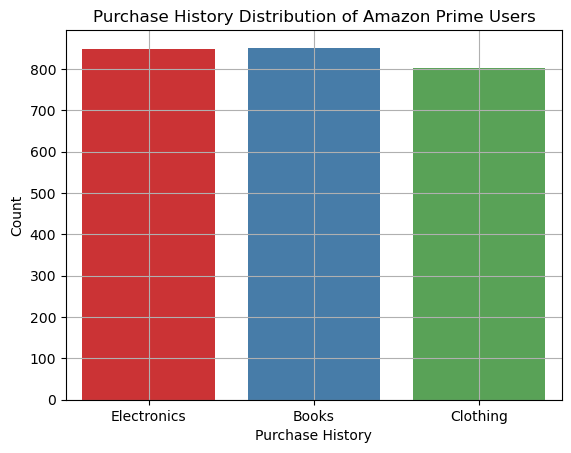

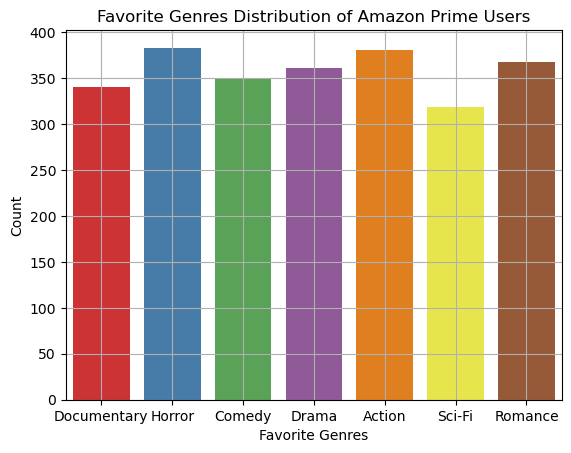

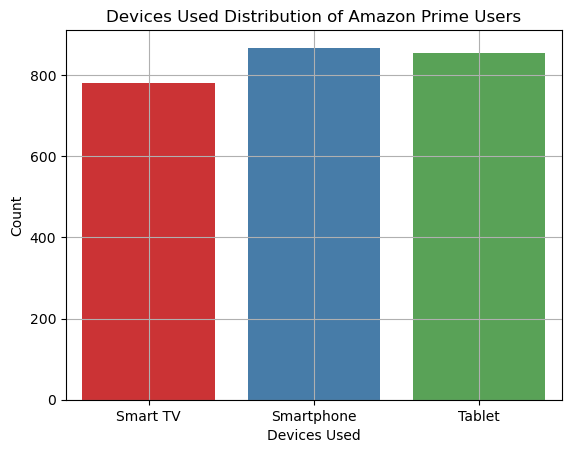

In [47]:
# 데이터 구조를 확인합니다.
plt.figure(figsize=(6, 4))

# Plot distribution of age
sns.histplot(selected_data['Year of Birth'], bins=30, kde=True, palette='Set1')
plt.title('Age Distribution of Amazon Prime Users')
plt.xlabel('Year of Birth')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Plot gender distribution
sns.countplot(x='Gender', data=data, palette='Set1')
plt.title('Gender Distribution of Amazon Prime Users')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Subscription Plan Distribution
sns.countplot(x='Subscription Plan', data=data, order=data['Subscription Plan'].value_counts().index, palette='Set1')
plt.title('Subscription Plan Distribution')
plt.xlabel('Subscription Plan')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Plot Usage Frequency
sns.countplot(x='Usage Frequency', data=data, palette='Set1')
plt.title('Usage Frequency Distribution of Amazon Prime Users')
plt.xlabel('Usage Frequency')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Plot Engagement Metrics
sns.countplot(x='Engagement Metrics', data=data, palette='Set1')
plt.title('Engagement Metrics Distribution of Amazon Prime Users')
plt.xlabel('Engagement Metrics')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Plot Purchase History
sns.countplot(x='Purchase History', data=data, palette='Set1')
plt.title('Purchase History Distribution of Amazon Prime Users')
plt.xlabel('Purchase History')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Plot Favorite Genres
sns.countplot(x='Favorite Genres', data=data, palette='Set1')
plt.title('Favorite Genres Distribution of Amazon Prime Users')
plt.xlabel('Favorite Genres')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Plot Devices Used
sns.countplot(x='Devices Used', data=data, palette='Set1')
plt.title('Devices Used Distribution of Amazon Prime Users')
plt.xlabel('Devices Used')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [48]:
X = selected_data.drop(['Subscription Plan'], axis=1)
y = selected_data['Subscription Plan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [49]:
selected_data.head()

,Year of Birth,Subscription Plan,Engagement Metrics,Customer Support Interactions,Female,Male,Frequent,Occasional,Regular,Books,...,Action,Comedy,Documentary,Drama,Horror,Romance,Sci-Fi,Smart TV,Smartphone,Tablet
0,1953,0,0.5,3,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,1978,1,0.5,7,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,1994,1,0.3,8,1,0,0,0,1,1,...,0,1,0,0,0,0,0,1,0,0
3,1964,1,0.7,7,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,1961,0,0.3,1,0,1,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


# Model(Define, Train, Test)

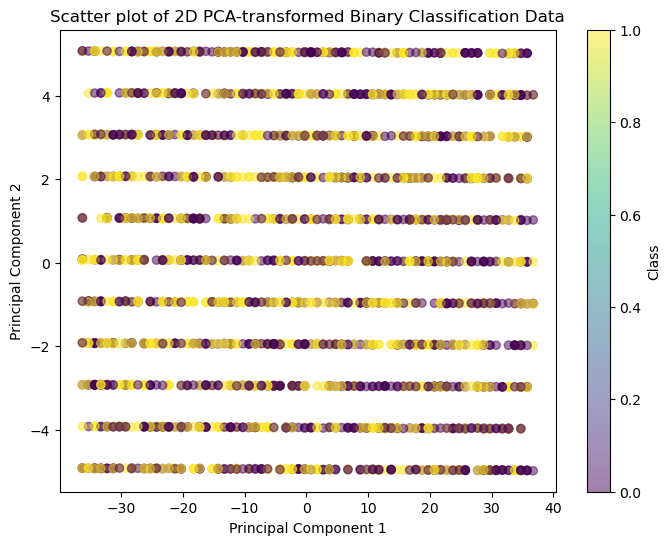

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification

# PCA를 사용하여 21차원 데이터를 2차원으로 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title('Scatter plot of 2D PCA-transformed Binary Classification Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.show()

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

dt_clf = DecisionTreeClassifier(random_state=156)

params = {
    'max_depth': [8, 12, 16, 20], 
    'min_samples_split': [16, 24],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('결정트리 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))

best_dt_clf = grid_cv.best_estimator_
y_pred = best_dt_clf.predict(X_test)
print(classification_report(y_test, y_pred))

feature_importances = best_dt_clf.feature_importances_

# 피처 중요도 출력
print("Feature Importance:")
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: {importance:.4f}")


최적 하이퍼 파라미터: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 24}
결정트리 최고 평균 정확도 수치: 0.5245
              precision    recall  f1-score   support

           0       0.46      0.56      0.50       236
           1       0.50      0.40      0.44       264

    accuracy                           0.48       500
   macro avg       0.48      0.48      0.47       500
weighted avg       0.48      0.48      0.47       500

Feature Importance:
Feature 0: 0.4416
Feature 1: 0.0227
Feature 2: 0.1737
Feature 3: 0.0404
Feature 4: 0.0006
Feature 5: 0.0303
Feature 6: 0.0039
Feature 7: 0.0344
Feature 8: 0.0192
Feature 9: 0.0135
Feature 10: 0.0048
Feature 11: 0.0100
Feature 12: 0.0208
Feature 13: 0.0694
Feature 14: 0.0257
Feature 15: 0.0000
Feature 16: 0.0007
Feature 17: 0.0100
Feature 18: 0.0111
Feature 19: 0.0095
Feature 20: 0.0576


In [52]:
params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=5, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('랜덤 포레스트 최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

best_dt_clf = grid_cv.best_estimator_
y_pred = best_dt_clf.predict(X_test)
print(classification_report(y_test, y_pred))

최적 하이퍼 파라미터:
 {'max_depth': 6, 'min_samples_leaf': 12, 'min_samples_split': 8, 'n_estimators': 100}
랜덤 포레스트 최고 예측 정확도: 0.5155
              precision    recall  f1-score   support

           0       0.47      0.66      0.55       236
           1       0.53      0.34      0.41       264

    accuracy                           0.49       500
   macro avg       0.50      0.50      0.48       500
weighted avg       0.50      0.49      0.48       500



In [72]:
params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}

gb_clf = GradientBoostingClassifier(random_state=0)
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('GBM 최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

best_dt_clf = grid_cv.best_estimator_
y_pred = best_dt_clf.predict(X_test)
print(classification_report(y_test, y_pred))

최적 하이퍼 파라미터:
 {'learning_rate': 0.05, 'n_estimators': 100}
GBM 최고 예측 정확도: 0.5135
              precision    recall  f1-score   support

           0       0.45      0.58      0.51       236
           1       0.50      0.38      0.43       264

    accuracy                           0.47       500
   macro avg       0.47      0.48      0.47       500
weighted avg       0.48      0.47      0.46       500



In [70]:
xgb_model = XGBClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("최적 하이퍼 파라미터:", grid_search.best_params_)
print("XGBoost 최고 예측 정확도:", grid_search.best_score_)

best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

feature_importances = best_xgb_model.feature_importances_

# 피처 중요도 출력
print("Feature Importance:")
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: {importance:.4f}")

최적 하이퍼 파라미터: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
XGBoost 최고 예측 정확도: 0.524
              precision    recall  f1-score   support

           0       0.47      0.69      0.56       236
           1       0.52      0.30      0.38       264

    accuracy                           0.49       500
   macro avg       0.50      0.50      0.47       500
weighted avg       0.50      0.49      0.47       500

Feature Importance:
Feature 0: 0.0893
Feature 1: 0.0385
Feature 2: 0.0430
Feature 3: 0.0543
Feature 4: 0.0000
Feature 5: 0.0573
Feature 6: 0.0557
Feature 7: 0.0440
Feature 8: 0.0795
Feature 9: 0.0989
Feature 10: 0.0521
Feature 11: 0.0000
Feature 12: 0.0521
Feature 13: 0.0256
Feature 14: 0.0500
Feature 15: 0.0547
Feature 16: 0.0000
Feature 17: 0.1135
Feature 18: 0.0321
Feature 19: 0.0000
Feature 20: 0.0594


In [71]:
lgb_model = LGBMClassifier(n_estimators=400, learning_rate=0.05)

# 튜닝할 하이퍼 파라미터 그리드 설정
param_grid = {
    'num_leaves': [20, 30, 40],
    'max_depth': [5, 10, 15],
    'min_child_samples': [10, 20, 30]
}

grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("최적 하이퍼 파라미터:", grid_search.best_params_)
print("Lightgbm 최고 예측 정확도:", grid_search.best_score_)

best_lgb_model = grid_search.best_estimator_

y_pred = best_lgb_model.predict(X_test)
print("Evaluation Report:")
print(classification_report(y_test, y_pred))

feature_importances = best_lgb_model.feature_importances_

# 피처 중요도 출력
print("Feature Importance:")
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: {importance:.4f}")

최적 하이퍼 파라미터: {'max_depth': 5, 'min_child_samples': 30, 'num_leaves': 30}
Lightgbm 최고 예측 정확도: 0.5045
Evaluation Report:
              precision    recall  f1-score   support

           0       0.49      0.61      0.54       236
           1       0.55      0.43      0.48       264

    accuracy                           0.51       500
   macro avg       0.52      0.52      0.51       500
weighted avg       0.52      0.51      0.51       500

Feature Importance:
Feature 0: 2313.0000
Feature 1: 383.0000
Feature 2: 1167.0000
Feature 3: 272.0000
Feature 4: 34.0000
Feature 5: 185.0000
Feature 6: 157.0000
Feature 7: 116.0000
Feature 8: 136.0000
Feature 9: 108.0000
Feature 10: 172.0000
Feature 11: 111.0000
Feature 12: 98.0000
Feature 13: 103.0000
Feature 14: 83.0000
Feature 15: 118.0000
Feature 16: 101.0000
Feature 17: 111.0000
Feature 18: 198.0000
Feature 19: 125.0000
Feature 20: 146.0000


In [76]:
logistic_model = LogisticRegression()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("최적 하이퍼 파라미터:", grid_search.best_params_)
print("로지스틱 회귀 최고 예측 정확도:", grid_search.best_score_)

# 최적의 모델 추출
best_logistic_model = grid_search.best_estimator_

# 최적의 모델로 평가
y_pred = best_logistic_model.predict(X_test)
print("Evaluation Report:")
print(classification_report(y_test, y_pred))

최적 하이퍼 파라미터: {'C': 0.001}
로지스틱 회귀 최고 예측 정확도: 0.5165
Evaluation Report:
              precision    recall  f1-score   support

           0       0.47      1.00      0.64       236
           1       0.00      0.00      0.00       264

    accuracy                           0.47       500
   macro avg       0.24      0.50      0.32       500
weighted avg       0.22      0.47      0.30       500



C:\Users\KimTY\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KimTY\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KimTY\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [77]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

svm_model = SVC(random_state=42)

# 조정할 하이퍼파라미터 그리드 설정
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 및 점수 출력
print("최적 하이퍼 파라미터:", grid_search.best_params_)
print("SVC 최고 예측 정확도: {0:.4f}".format(grid_search.best_score_))

# 최적의 모델 추출
best_svm_model = grid_search.best_estimator_

# 최적의 모델로 평가
y_pred = best_svm_model.predict(X_test)
print("Evaluation Report:")
print(classification_report(y_test, y_pred))

최적 하이퍼 파라미터: {'C': 100, 'kernel': 'sigmoid'}
SVC 최고 예측 정확도: 0.5260
Evaluation Report:
              precision    recall  f1-score   support

           0       0.47      0.51      0.49       236
           1       0.52      0.48      0.50       264

    accuracy                           0.50       500
   macro avg       0.50      0.50      0.50       500
weighted avg       0.50      0.50      0.50       500

